<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/JARVIS_FEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%time
try:
    import google.colab  # noqa: F401
except ImportError:
    import ufl_legacy
    import dolfin
else:
    try:
        import ufl_legacy
        import dolfin
    except ImportError:
        !wget "https://fem-on-colab.github.io/releases/fenics-install-real.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
        import ufl_legacy
        import dolfin

--2024-06-08 21:13:49--  https://fem-on-colab.github.io/releases/fenics-install-real.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4161 (4.1K) [application/x-sh]
Saving to: ‘/tmp/fenics-install.sh’

/tmp/fenics-install 100%[===================>]   4.06K  --.-KB/s    in 0s      

2024-06-08 21:13:49 (41.1 MB/s) - ‘/tmp/fenics-install.sh’ saved [4161/4161]

+ INSTALL_PREFIX=/usr/local
++ awk -F/ '{print NF-1}'
++ echo /usr/local
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FENICS_INSTALLED=/usr/local/share/fem-on-colab/fenics.installed
+ [[ ! -f /usr/local/share/fem-on-colab/fenics.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/c990175/releases/pybind11-inst

This script sets up and solves a 2D linear elasticity problem using the FEniCS library. The key steps involve:

Mesh Generation: Creating a mesh for the domain.

Material Properties: Defining the elastic properties of the material.

Variational Formulation: Setting up the weak form of the elasticity equations.

Boundary Conditions: Applying appropriate boundary conditions.

Solving: Solving the resulting linear system to obtain the displacement field.

Postprocessing: Visualizing the results.

# 2D linear elasticity

In [2]:
#https://comet-fenics.readthedocs.io/en/latest/demo/elasticity/2D_elasticity.py.html
from dolfin import *

# Define the dimensions of the beam and the resolution of the mesh.
# Create a rectangular mesh representing the beam using RectangleMesh.
L = 25.
H = 1.
Nx = 250
Ny = 10
mesh = RectangleMesh(Point(0., 0.), Point(L, H), Nx, Ny, "crossed")
mesh

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_f4c31f6e8b0e7ddceb14ce599aa08d063c1bdf82

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00516462 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.503089 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representatio

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_6ab56968c6ffa883272fd990bd40fad8bf858cca

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00323558 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0144472 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_182f7c8c9518f4f008d82550433c7d1764bb9605

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      1
  Arguments:                 '(v_0)'
  Number of coefficients:    1
  Coefficients:              '[f_5]'
  Unique elements:           'Vector<2 x CG2(?,?)>, Vector<2 x R0(?,?)>, Vector<2 x 
                             CG1(?,?)>'
  Unique sub elements:       'Vector<2 x CG2(?,?)>, Vector<2 x R0(?,?)>, Vector<2 x 
                             CG1(?,?)>, CG2(?,?), R0(?,?), CG1(?,?)'
  
INFO:F

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_17d5bd7e022a45e71c9f390bd00f3f09885a1fd0

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00390887 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.022604 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representatio

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_0bb6ea8295a9d49109447a98e18601bb13d2b05f

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00622678 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0168364 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_3801828c0f66b7190a7fd5819465b3d5b34b9149

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00563049 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0144372 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_4f750817ecc896f3bedcb4ff8c9f3352153b1b38

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00515771 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0332367 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling coordinate_mapping ffc_coordinate_mapping_3720490578293ae8ad5feabedc46584f48fda4c4

INFO:FFC:Compiler stage 1: Analyzing coordinate_mapping(s)
INFO:FFC:-------------------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00408053 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 0 elements
INFO:FFC:  Computing representation of 0 dofmaps
INFO:FFC:  Computing representation of 1 coordinate mappings
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0151181 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:--------------------------------------------------------
INFO

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_5be5b5153fcd04b87014cca7334ef51dddec653a

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      2
  Arguments:                 '(v_0, v_1)'
  Number of coefficients:    2
  Coefficients:              '[f_3, f_4]'
  Unique elements:           'Vector<2 x CG2(?,?)>, R0(?,?), Vector<2 x CG1(?,?)>'
  Unique sub elements:       'Vector<2 x CG2(?,?)>, R0(?,?), Vector<2 x CG1(?,?)>, C
                             G2(?,?), CG1(?,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degr

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_82a53c44eef9856bb7c50f989a687f5eca40ef43

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      2
  Arguments:                 '(v_0, v_1)'
  Number of coefficients:    0
  Coefficients:              '[]'
  Unique elements:           'Vector<2 x CG1(?,?)>'
  Unique sub elements:       'Vector<2 x CG1(?,?)>, CG1(?,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 2
INFO:FFC:  quadrature_degree: 2
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0684714 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:---------------------------------------

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_899f792bca9deb3c3f12f5cb62d42f0545d411ea

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00317121 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.016175 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representatio

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_79dd4099c4e669212673d783637297ee756e6a33

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00788045 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0277121 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling coordinate_mapping ffc_coordinate_mapping_66170f427fb7c9d9caadb39d728b0be317507df5

INFO:FFC:Compiler stage 1: Analyzing coordinate_mapping(s)
INFO:FFC:-------------------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00496936 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 0 elements
INFO:FFC:  Computing representation of 0 dofmaps
INFO:FFC:  Computing representation of 1 coordinate mappings
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0138149 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:--------------------------------------------------------
INFO

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_10af85b83c7e8bb3dae5fe08af789f0826dbb666

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      1
  Arguments:                 '(v_0)'
  Number of coefficients:    1
  Coefficients:              '[Displacement]'
  Unique elements:           'Vector<2 x CG1(?,?)>, Vector<2 x CG2(?,?)>'
  Unique sub elements:       'Vector<2 x CG1(?,?)>, Vector<2 x CG2(?,?)>, CG1(?,?), 
                             CG2(?,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 3
INFO:FFC:  quadrature_degree: 3
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0331812 seconds.

INFO:FFC:Compiler stag

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_6374535ba84ea32d2351d1e531a3a93b7a39dbac

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00296807 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0141389 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_f1123183e51000de7622db02db722391ef7ef0d0

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00509596 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0242374 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

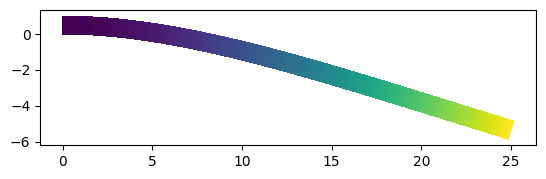

In [3]:
# Define the strain tensor, which is the symmetric part of the gradient of the displacement vector field v.
def eps(v):
    return sym(grad(v))

# Define the material properties: Young's modulus E and Poisson's ratio 𝜈
# Specify the model type. Here, "plane_stress" is used.
E = Constant(1e5)
nu = Constant(0.3)
model = "plane_stress"

#Compute the Lame parameters 𝜇 and 𝜆 based on the material properties and adjust  𝜆 for the plane stress condition.
mu = E/2/(1+nu)
lmbda = E*nu/(1+nu)/(1-2*nu)
if model == "plane_stress":
    lmbda = 2*mu*lmbda/(lmbda+2*mu)

# Define the stress tensor σ using the strain tensor and the Lame parameters.
# Define a constant body force f, representing gravity in the negative y-direction.
def sigma(v):
    return lmbda*tr(eps(v))*Identity(2) + 2.0*mu*eps(v)
rho_g = 1e-3
f = Constant((0, -rho_g))


# Define the function space V for the displacement field using quadratic Lagrange elements.
# Define the trial function du and test function u_ for the variational formulation.
# Define the bilinear form a (stiffness matrix) and the linear form l (load vector).

V = VectorFunctionSpace(mesh, 'Lagrange', degree=2)
du = TrialFunction(V)


#Define a function to identify the left boundary (x=0), where the beam is clamped.
#Apply a Dirichlet boundary condition bc to fix the displacement to zero at the left boundary.

u_ = TestFunction(V)
a = inner(sigma(du), eps(u_))*dx
l = inner(f, u_)*dx
def left(x, on_boundary):
    return near(x[0], 0)

bc = DirichletBC(V, Constant((0.,0.)), left)


# Define the solution function u for the displacement field.
# Solve the variational problem a == l with the boundary condition bc and store the solution in u.
u = Function(V, name="Displacement")
solve(a == l, u, bc)

#Plot the displacement field, scaled by a factor of 1000 for better visualization.
plot(1e3*u, mode="displacement")

In [4]:
print("Maximal deflection:", -u(L,H/2.)[1])
print("Beam theory deflection:", float(3*rho_g*L**4/2/E/H**3))

Maximal deflection: 0.005863753942800368
Beam theory deflection: 0.005859375


In [ ]:
type(u)

dolfin.function.function.Function

# Orthotropic linear elasticity

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_d41f70c3f1ac4d5a48d48c7706406a2cc5a5fc83

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 2
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_64]'
  Unique elements:                     'Vector<2 x CG2(?,?)>, Vector<2 x R0(?,?)>, V
                                       ector<2 x CG1(?,?)>'
  Unique sub elements:                 'Vector<2 x CG2(?,?)>, Vector<2 x R0(?,?)>,

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_02e77f716b9867c9d908897e8db37680d081feaa

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      2
  Arguments:                 '(v_0, v_1)'
  Number of coefficients:    0
  Coefficients:              '[]'
  Unique elements:           'Vector<2 x CG2(?,?)>, Vector<2 x CG1(?,?)>'
  Unique sub elements:       'Vector<2 x CG2(?,?)>, Vector<2 x CG1(?,?)>, CG2(?,?), 
                             CG1(?,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 2
INFO:FFC:  quadrature_degree: 2
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.107303 seconds.

INFO:FFC:Compiler stage 2: Com

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_e60a432166f66faa9cd5096f9105cba41287be48

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      2
  Arguments:                 '(v_0, v_1)'
  Number of coefficients:    0
  Coefficients:              '[]'
  Unique elements:           'CG1(?,?), Vector<2 x CG1(?,?)>'
  Unique sub elements:       'CG1(?,?), Vector<2 x CG1(?,?)>'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 2
INFO:FFC:  quadrature_degree: 2
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0405724 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-----------------------------

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_6e5d68ec3b78f62d2029ce237683aef3fad5cda1

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      1
  Arguments:                 '(v_0)'
  Number of coefficients:    2
  Coefficients:              '[Displacement, f_64]'
  Unique elements:           'CG1(?,?), Vector<2 x CG2(?,?)>, Vector<2 x R0(?,?)>, V
                             ector<2 x CG1(?,?)>'
  Unique sub elements:       'CG1(?,?), Vector<2 x CG2(?,?)>, Vector<2 x R0(?,?)>, V
                             ector<2 x CG1(?,?)>, CG2

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_57242e89d9d2025a31d222a247de5fd5a95dbf7d

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0036428 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.015492 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_f1c70d98cdc5f085e2f3b5cc5b4ebcccf0947d58

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00596237 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.020541 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representatio

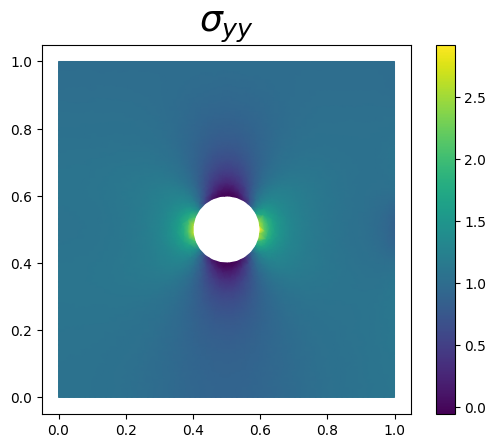

In [5]:
#https://comet-fenics.readthedocs.io/en/latest/demo/elasticity/orthotropic_elasticity.py.html
from dolfin import *
from mshr import *

L, R = 1., 0.1
N = 50 # mesh density

circle_position = [0.5,0.5]
domain = Rectangle(Point(0.,0.), Point(L, L)) - Circle(Point(circle_position), R)
mesh = generate_mesh(domain, N)

Ex, Ey, nuxy, Gxy = 100., 10., 0.3, 5.
S = as_matrix([[1./Ex,-nuxy/Ex,0.],[-nuxy/Ex,1./Ey,0.],[0.,0.,1./Gxy]])
C = inv(S)

def eps(v):
    return sym(grad(v))
def strain2voigt(e):
    """e is a 2nd-order tensor, returns its Voigt vectorial representation"""
    return as_vector([e[0,0],e[1,1],2*e[0,1]])
def voigt2stress(s):
    """
    s is a stress-like vector (no 2 factor on last component)
    returns its tensorial representation
    """
    return as_tensor([[s[0], s[2]],
                     [s[2], s[1]]])
def sigma(v):
    return voigt2stress(dot(C, strain2voigt(eps(v))))

# SubDomain inheritance
class Top(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[1], L) and on_boundary
class Left(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[0], 0) and on_boundary
class Bottom(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[1], 0) and on_boundary

# exterior facets MeshFunction
facets = MeshFunction("size_t", mesh, 1)
facets.set_all(0)
Top().mark(facets, 1)
Left().mark(facets, 2)
Bottom().mark(facets, 3)
ds = Measure('ds', subdomain_data=facets)

# Define function space
V = VectorFunctionSpace(mesh, 'Lagrange', 2)

# Define variational problem
du = TrialFunction(V)
u_ = TestFunction(V)
u = Function(V, name='Displacement')
a = inner(sigma(du), eps(u_))*dx

# uniform traction on top boundary
T = Constant((0, 1e-3))
l = dot(T, u_)*ds(1)

# symmetry boundary conditions
bc = [DirichletBC(V.sub(0), Constant(0.), facets, 2), #left
      DirichletBC(V.sub(1), Constant(0.), facets, 3)] #bottom

solve(a == l, u, bc)

import matplotlib.pyplot as plt
p = plot(sigma(u)[1, 1]/T[1], mode='color')
plt.colorbar(p)
plt.title(r"$\sigma_{yy}$",fontsize=26)
plt.show()

# Axisymmetric formulation for elastic structures of revolution

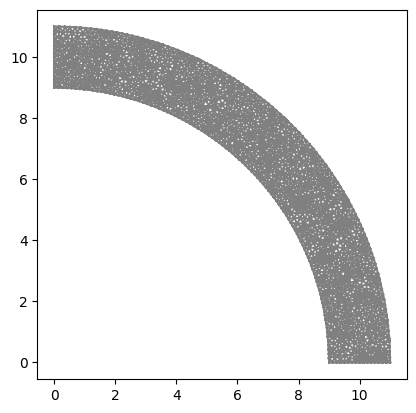

In [6]:
#https://comet-fenics.readthedocs.io/en/latest/demo/elasticity/axisymmetric_elasticity.html
from __future__ import print_function
from dolfin import *
from mshr import *
import matplotlib.pyplot as plt


Re = 11.
Ri = 9.
rect = Rectangle(Point(0., 0.), Point(Re, Re))
domain = Circle(Point(0., 0.), Re, 100) - Circle(Point(0., 0.), Ri, 100)
domain = domain - Rectangle(Point(0., -Re), Point(-Re, Re)) \
                - Rectangle(Point(0., 0.), Point(Re, -Re))

mesh = generate_mesh(domain, 40)
plot(mesh)

class Bottom(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[1], 0) and on_boundary
class Left(SubDomain):
    def inside(self, x, on_boundary):
        return near(x[0], 0) and on_boundary
class Outer(SubDomain):
    def inside(self, x, on_boundary):
        return near(sqrt(x[0]**2+x[1]**2), Re, 1e-1) and on_boundary

facets = MeshFunction("size_t", mesh, 1)
facets.set_all(0)
Bottom().mark(facets, 1)
Left().mark(facets, 2)
Outer().mark(facets, 3)
ds = Measure("ds", subdomain_data=facets)

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_c8525360fbdecdbcc01968eee2839179a793966f

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:                 2
  Number of exterior_facet subdomains: 4
  Rank:                                1
  Arguments:                           '(v_0)'
  Number of coefficients:              1
  Coefficients:                        '[f_129]'
  Unique elements:                     'Vector<2 x CG2(?,?)>, R0(?,?), Vector<2 x CG
                                       1(?,?)>'
  Unique sub elements:                 'Vector<2 x CG2(?,?)>, R0(?,?), Vector<2 x CG
                                       1(?,?)>, CG2(?,?), CG1(?,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_d156de119399440b9cb404e524c60ea536d58bfe

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:UFL_LEGACY:Adjusting missing element cell to triangle.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      2
  Arguments:                 '(v_0, v_1)'
  Number of coefficients:    2
  Coefficients:              '[f_127, f_128]'
  Unique elements:           'Vector<2 x CG2(?,?)>, R0(?,?), Vector<2 x CG1(?,?)>'
  Unique sub elements:       'Vector<2 x CG2(?,?)>, R0(?,?), Vector<2 x CG1(?,?)>, C
                             G2(?,?), CG1(?,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_

Inwards radial displacement at (r=Re, theta=0): 0.0018375 (FE) 0.0018387 (Exact)
Inwards radial displacement at (r=Ri, theta=0): 0.0020879 (FE) 0.0020894 (Exact)
Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_a536d55f256a17e81fb48a0d4d82a80a2ac398c7

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      1
  Arguments:                 '(v_0)'
  Number of coefficients:    1
  Coefficients:              '[Displacement]'
  Unique elements:           'Vector<2 x CG1(?,?)>, Vector<2 x CG2(?,?)>'
  Unique sub elements:       'Vector<2 x CG1(?,?)>, Vector<2 x CG2(?,?)>, CG1(?,?), 
                             CG2(?,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 3
INFO:FFC:  quadrature_degree: 3
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0529971 seconds.

INFO:FFC:Compiler stag

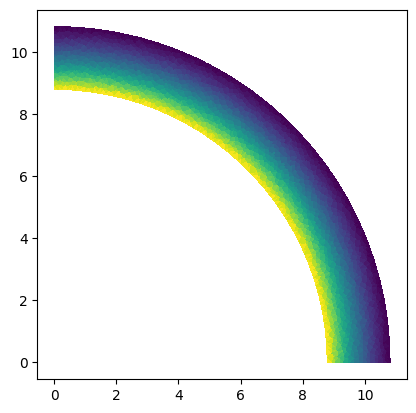

In [7]:
x = SpatialCoordinate(mesh)

def eps(v):
    return sym(as_tensor([[v[0].dx(0), 0, v[0].dx(1)],
                          [0, v[0]/x[0], 0],
                          [v[1].dx(0), 0, v[1].dx(1)]]))

E = Constant(1e5)
nu = Constant(0.3)
mu = E/2/(1+nu)
lmbda = E*nu/(1+nu)/(1-2*nu)
def sigma(v):
    return lmbda*tr(eps(v))*Identity(3) + 2.0*mu*eps(v)
n = FacetNormal(mesh)
p = Constant(10.)

V = VectorFunctionSpace(mesh, 'CG', degree=2)
du = TrialFunction(V)
u_ = TestFunction(V)
a = inner(sigma(du), eps(u_))*x[0]*dx
l = inner(-p*n, u_)*x[0]*ds(3)

u = Function(V, name="Displacement")
bcs = [DirichletBC(V.sub(1), Constant(0), facets, 1),
       DirichletBC(V.sub(0), Constant(0), facets, 2)]
solve(a == l, u, bcs)
print("Inwards radial displacement at (r=Re, theta=0): \
{:1.7f} (FE) {:1.7f} (Exact)".format(-u(Re, 0.)[0], float(Re**3/(Re**3-Ri**3)*((1-2*nu)*Re+(1+nu)*Ri**3/2/Re**2)*p/E)))
print("Inwards radial displacement at (r=Ri, theta=0): \
{:1.7f} (FE) {:1.7f} (Exact)".format(-u(Ri, 0.)[0], float(Re**3/(Re**3-Ri**3)*((1-2*nu)*Ri+(1+nu)*Ri/2)*p/E)))
plt.figure()
plot(100*u, mode="displacement")
plt.show()

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_7806eb9d4db2dda177cc574d41bb3f929e5c017d

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       2
  Number of cell subdomains: 0
  Rank:                      1
  Arguments:                 '(v_0)'
  Number of coefficients:    1
  Coefficients:              '[Displacement]'
  Unique elements:           'Vector<2 x CG1(?,?)>, Vector<2 x CG2(?,?)>'
  Unique sub elements:       'Vector<2 x CG1(?,?)>, Vector<2 x CG2(?,?)>, CG1(?,?), 
                             CG2(?,?)'
  
INFO:FFC:  representation:    auto --> uflacs
INFO:FFC:  quadrature_rule:   auto --> default
INFO:FFC:  quadrature_degree: auto --> 3
INFO:FFC:  quadrature_degree: 3
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.0334749 seconds.

INFO:FFC:Compiler stag

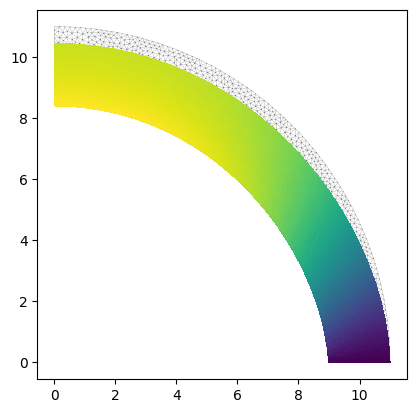

In [8]:
bcs = [DirichletBC(V, Constant((0., 0.)), facets, 1),
       DirichletBC(V.sub(0), Constant(0), facets, 2)]
solve(a == l, u, bcs)
plt.figure()
plot(mesh, linewidth=0.2)
plot(200*u, mode="displacement")
plt.show()

In [9]:
import matplotlib.pyplot as plt
from dolfin import *
# Optimization options for the form compiler
parameters["form_compiler"]["cpp_optimize"] = True
parameters["form_compiler"]["representation"] = "uflacs"
# Create mesh and define function space
mesh = UnitCubeMesh(24, 16, 16)
V = VectorFunctionSpace(mesh, "Lagrange", 1)

# Mark boundary subdomians
#https://fenicsproject.org/olddocs/dolfin/latest/python/demos/hyperelasticity/demo_hyperelasticity.py.html
left =  CompiledSubDomain("near(x[0], side) && on_boundary", side = 0.0)
right = CompiledSubDomain("near(x[0], side) && on_boundary", side = 1.0)
# Define Dirichlet boundary (x = 0 or x = 1)
c = Constant((0.0, 0.0, 0.0))
r = Expression(("scale*0.0",
                "scale*(y0 + (x[1] - y0)*cos(theta) - (x[2] - z0)*sin(theta) - x[1])",
                "scale*(z0 + (x[1] - y0)*sin(theta) + (x[2] - z0)*cos(theta) - x[2])"),
                scale = 0.5, y0 = 0.5, z0 = 0.5, theta = pi/3, degree=2)
bcl = DirichletBC(V, c, left)
bcr = DirichletBC(V, r, right)
bcs = [bcl, bcr]
# Define functions
du = TrialFunction(V)            # Incremental displacement
v  = TestFunction(V)             # Test function
u  = Function(V)                 # Displacement from previous iteration
B  = Constant((0.0, -0.5, 0.0))  # Body force per unit volume
T  = Constant((0.1,  0.0, 0.0))  # Traction force on the boundary
# Kinematics
d = len(u)
I = Identity(d)             # Identity tensor
F = I + grad(u)             # Deformation gradient
C = F.T*F                   # Right Cauchy-Green tensor

# Invariants of deformation tensors
Ic = tr(C)
J  = det(F)
# Elasticity parameters
E, nu = 10.0, 0.3
mu, lmbda = Constant(E/(2*(1 + nu))), Constant(E*nu/((1 + nu)*(1 - 2*nu)))

# Stored strain energy density (compressible neo-Hookean model)
psi = (mu/2)*(Ic - 3) - mu*ln(J) + (lmbda/2)*(ln(J))**2

# Total potential energy
Pi = psi*dx - dot(B, u)*dx - dot(T, u)*ds
# Compute first variation of Pi (directional derivative about u in the direction of v)
F = derivative(Pi, u, v)

# Compute Jacobian of F
J = derivative(F, u, du)
# Solve variational problem
solve(F == 0, u, bcs, J=J)
# Save solution in VTK format
file = File("displacement.pvd");
file << u;

# # Plot solution
# plot(u)
# plt.show()

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_4ee7dda1d7b473e31c1bec40c9e7792c863b1125

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00678515 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.180904 seconds.

INFO:FFC:Compiler stage 3

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_2a4b2b3f8082b6c983164863c1e1f3eb07ab03b0

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00310183 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0141037 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_3265c7c42c1577c0bd56de59a9fc88c197d864f8

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to tetrahedron.
INFO:UFL_LEGACY:Adjusting missing element cell to tetrahedron.
INFO:UFL_LEGACY:Adjusting missing element cell to tetrahedron.
INFO:UFL_LEGACY:Adjusting missing element cell to tetrahedron.
INFO:UFL_LEGACY:Adjusting missing element cell to tetrahedron.
INFO:UFL_LEGACY:Adjusting missing element cell to tetrahedron.
INFO:UFL_LEGACY:Adjusting missing element cell to tetrahedron.
INFO:UFL_LEGACY:Adjusting missing element cell to tetrahedron.
INFO:UFL_LEGACY:Adjusting missing element cell to tetrahedron.
INFO:UFL_LEGACY:Adjusting missing element cell to tetrahedron.
INFO:FFC:  
INFO:FFC:  Geometric dimension:              

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_9d4792a8e455104cf4cdfa101484965de276b4ce

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00328827 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0143507 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling element ffc_element_23ed19f2af635dacbfb4d2a22f824def2fb5d3bb

INFO:FFC:Compiler stage 1: Analyzing element(s)
INFO:FFC:--------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00600338 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 1 elements
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 1 dofmaps
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of 0 coordinate mappings
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0407183 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representati

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling coordinate_mapping ffc_coordinate_mapping_cb91212a3c902077e7f3e6e446b465b713a272bd

INFO:FFC:Compiler stage 1: Analyzing coordinate_mapping(s)
INFO:FFC:-------------------------------------------------
INFO:FFC:  
INFO:FFC:Compiler stage 1 finished in 0.00801754 seconds.

INFO:FFC:Compiler stage 2: Computing intermediate representation
INFO:FFC:-------------------------------------------------------
INFO:FFC:  Computing representation of 0 elements
INFO:FFC:  Computing representation of 0 dofmaps
INFO:FFC:  Computing representation of 1 coordinate mappings
DEBUG:FFC:  Reusing element from cache
INFO:FFC:  Computing representation of integrals
INFO:FFC:  Computing representation of forms
INFO:FFC:  
INFO:FFC:Compiler stage 2 finished in 0.0189195 seconds.

INFO:FFC:Compiler stage 3: Optimizing intermediate representation
INFO:FFC:--------------------------------------------------------
INFO

Calling FFC just-in-time (JIT) compiler, this may take some time.


Level 25:FFC:Calling FFC just-in-time (JIT) compiler, this may take some time.
INFO:FFC:Compiling form ffc_form_b2da49b168727384c4fa1a3be20948155e38eafd

INFO:FFC:Compiler stage 1: Analyzing form(s)
INFO:FFC:-----------------------------------
DEBUG:FFC:  Preprocessing form using 'uflacs' representation family.
INFO:UFL_LEGACY:Adjusting missing element cell to tetrahedron.
INFO:UFL_LEGACY:Adjusting missing element cell to tetrahedron.
INFO:UFL_LEGACY:Adjusting missing element cell to tetrahedron.
INFO:UFL_LEGACY:Adjusting missing element cell to tetrahedron.
INFO:UFL_LEGACY:Adjusting missing element cell to tetrahedron.
INFO:UFL_LEGACY:Adjusting missing element cell to tetrahedron.
INFO:UFL_LEGACY:Adjusting missing element cell to tetrahedron.
INFO:UFL_LEGACY:Adjusting missing element cell to tetrahedron.
INFO:UFL_LEGACY:Adjusting missing element cell to tetrahedron.
INFO:UFL_LEGACY:Adjusting missing element cell to tetrahedron.
INFO:FFC:  
INFO:FFC:  Geometric dimension:       3
  Num

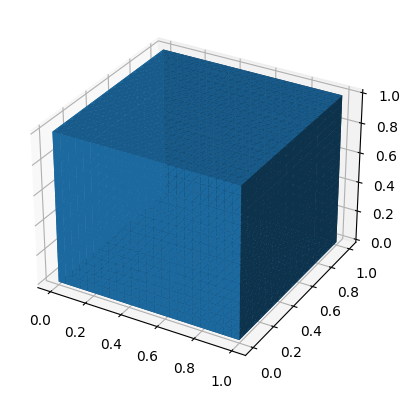

In [39]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d
import dolfin.cpp as cpp
import ufl_legacy as ufl
import numpy as np

__all__ = ['plot']

_meshfunction_types = (cpp.mesh.MeshFunctionBool,
                       cpp.mesh.MeshFunctionInt,
                       cpp.mesh.MeshFunctionDouble,
                       cpp.mesh.MeshFunctionSizet)

def mplot_mesh(ax, mesh, **kwargs):
    tdim = mesh.topology().dim()
    gdim = mesh.geometry().dim()
    if gdim == 2 and tdim == 2:
        color = kwargs.pop("color", '#808080')
        return ax.triplot(mesh2triang(mesh), color=color, **kwargs)
    elif gdim == 3 and tdim == 3:
        bmesh = cpp.mesh.BoundaryMesh(mesh, "exterior", order=False)
        mplot_mesh(ax, bmesh, **kwargs)
    elif gdim == 3 and tdim == 2:
        xy = mesh.coordinates()
        return ax.plot_trisurf(*[xy[:, i] for i in range(gdim)],
                               triangles=mesh.cells(), **kwargs)
    elif tdim == 1:
        x = [mesh.coordinates()[:, i] for i in range(gdim)]
        if gdim == 1:
            x.append(np.zeros_like(x[0]))
            ax.set_yticks([])
        marker = kwargs.pop('marker', 'o')
        return ax.plot(*x, marker=marker, **kwargs)
    else:
        assert False, "this code should not be reached"


def _plot_matplotlib(obj):



    gdim = mesh.geometry().dim()
    if gdim == 3 :
        # Importing this toolkit has side effects enabling 3d support
        from mpl_toolkits.mplot3d import axes3d  # noqa
        # Enabling the 3d toolbox requires some additional arguments
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
    else:
        ax = plt.gca()
        ax.set_aspect('equal')






    if isinstance(obj, cpp.function.Function):
        return mplot_function(ax, obj, **kwargs)
    elif isinstance(obj, cpp.function.Expression):
        return mplot_expression(ax, obj, mesh, **kwargs)
    elif isinstance(obj, cpp.mesh.Mesh):
        return mplot_mesh(ax, obj)
    elif isinstance(obj, cpp.fem.DirichletBC):
        return mplot_dirichletbc(ax, obj, **kwargs)
    elif isinstance(obj, _meshfunction_types):
        return mplot_meshfunction(ax, obj, **kwargs)
    else:
        raise AttributeError('Failed to plot %s' % type(obj))


_plot_matplotlib(u.function_space().mesh())

In [41]:
u.function_space().mesh()